In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
L=20
N=L**2
J=1

def create_picture(positions,colors):
    plt.cla()
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca())
    for pos, col in zip(positions,colors):
        square = plt.Rectangle((pos[0], pos[1]), 0.8, 0.8, fc = col)
        plt.gca().add_patch(square)
        
def color(i):
    if i == 1: return 'r'
    else: return 'b'

In [2]:
## Identifies the nearest neighbors of spin numbered i.
## Note that edges are identified, so that there are no boundaries.

def right(i):
    if (i+1)%L == 0: return i+1-L 
    else: return i+1

def left(i):
    if i%L == 0: return i-1+L
    else: return i-1

def up(i):
    return (i+L)%N

def down(i):
    return (i-L+N)%N

In [3]:
## List of neighbors of each spin.
neighbors = [[right(i),left(i),up(i),down(i)] for i in range(N)]
## coordinates of each spin. Just for visualization.
coordinates = [[i%L,i//L] for i in range(N)]
orientations = [1,-1]
spins = []
colors = []


##### initial spin assignment ##################

for i in range(N):
    spin = np.random.choice(orientations)
    spins.append(spin)
    
print(spin)
    


-1


In [4]:
nsteps = 100000
T = 2 # Temperature, in units of J/k_B.
beta = 1/T
Energy=[]
test=[]
for step in tqdm(range(nsteps)):
    k = np.random.randint(0, N - 1) ### Choose a random spin and try to flip it.
    delta_E = 2.0 * spins[k] * sum(spins[j] for j in neighbors[k]) # Change in energy due to the spin flip.
    pr=np.exp(-beta * delta_E)
    test.append(delta_E)
    if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E): # Metropolis accepatance probability.
        spins[k] *= -1
        Energy.append(delta_E)
        

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:03<00:00, 26470.90it/s]


In [ ]:
for i in range(N):
    colors.append(color(spins[i]))

create_picture(coordinates,colors);
print(spins)

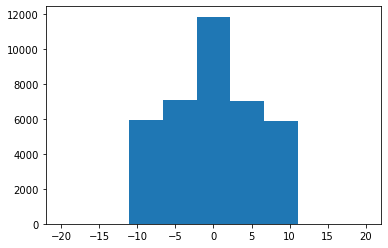

In [15]:
b=np.linspace(-20,20,10)
plt.hist(Energy,bins=b)
plt.show()
        
        

In [22]:

magnetisation=[]
Temp=np.linspace(0.001,5,20)
#P=[]
mag=[]
for t in tqdm(Temp):
    nsteps = 10*N
    T = t # Temperature, in units of J/k_B.
    beta = 1/T
    for step in range(nsteps):
        k = np.random.randint(0, N - 1) ### Choose a random spin and try to flip it.
        delta_E = 2.0 * spins[k] * sum(spins[j] for j in neighbors[k]) # Change in energy due to the spin flip.
        P=(np.exp(-beta *sum(delta_E)))
        if np.random.uniform(0.0, 1.0) < np.exp(-beta * delta_E): # Metropolis accepatance probability.
            spins[k] *= -1
            
    m=np.average(spins)
    mag_mean=m
    magnetisation.append(mag_mean)
    
    
    

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


4.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
-0.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
0.0
8.0
8.0
0.0
8.0
4.0
4.0
-0.0
4.0
4.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
4.0
8.0
8.0
8.0
4.0
8.0
4.0
8.0
8.0
0.0
4.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
8.0
4.0
8.0
4.0
4.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
8.0
8.0
8.0
8.0
0.0
4.0
8.0
4.0
4.0
8.0
8.0
8.0
8.0
8.0
4.0
4.0
8.0
8.0
8.0
4.0
8.0
4.0
8.0
8.0
8.0
4.0
8.0
0.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
0.0
8.0
0.0
0.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
0.0
8.0
8.0
8.0
0.0
8.0
8.0
8.0
8.0
-0.0
8.0
8.0
8.0
8.0
4.0
0.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
0.0
8.0
4.0
8.0


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
-0.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
0.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
4.0
4.0
8.0
8.0
8.0
4.0
8.0
4.0
8.0
4.0
8.0
8.0
8.0
8.0
4.0
8.0
4.0
8.0
8.0
8.0
8.0
4.0
4.0
8.0
0.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
-0.0
8.0
-0.0
8.0
4.0
8.0
8.0
8.0
8.0
0.0
8.0
8.0
4.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
4.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
-0.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
4.0
8.0
8.0
8.0
4.0
-0.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
4.0
8.0
-0.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
0.0
4.0
8.0
8.0
8.0
8.0
8.0
8.0
8.

TypeError: unsupported operand type(s) for +: 'int' and 'list'

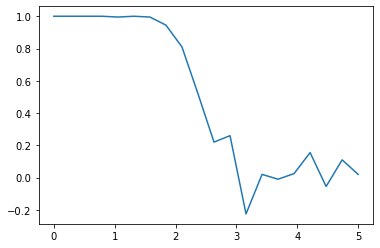

In [14]:
plt.plot(Temp,magnetisation)
plt.show()

In [8]:
print(delta_E)

0.0


In [5]:
print(test)

[-0.0, 4.0, 0.0, 4.0, 4.0, -0.0, -0.0, -4.0, 4.0, -8.0, 4.0, 4.0, 0.0, -4.0, -4.0, -0.0, -4.0, 8.0, 0.0, -4.0, -4.0, -0.0, 4.0, 4.0, 4.0, 4.0, -4.0, 0.0, -0.0, 0.0, -4.0, -0.0, 4.0, 4.0, 0.0, 0.0, 4.0, 8.0, -4.0, 0.0, 0.0, -0.0, 8.0, -0.0, 4.0, -8.0, 4.0, 4.0, 0.0, 4.0, -4.0, 4.0, 0.0, -4.0, 4.0, 4.0, 4.0, -4.0, 4.0, 4.0, 4.0, -4.0, 8.0, 8.0, -8.0, 0.0, -4.0, -0.0, -0.0, 4.0, -4.0, 4.0, -8.0, -8.0, 4.0, 4.0, 4.0, -4.0, 0.0, -0.0, 4.0, 8.0, 4.0, -4.0, 4.0, -4.0, -8.0, 0.0, 8.0, -0.0, -4.0, -4.0, -0.0, -0.0, -4.0, 0.0, 4.0, -8.0, -8.0, 0.0, 4.0, -4.0, -4.0, 4.0, -8.0, -0.0, -0.0, 8.0, 4.0, -4.0, 4.0, -0.0, -0.0, -4.0, 4.0, -4.0, 0.0, 0.0, 4.0, 4.0, 0.0, -4.0, 4.0, -0.0, 8.0, -8.0, 0.0, 0.0, -8.0, 8.0, -4.0, -4.0, -8.0, 4.0, 4.0, -0.0, 4.0, 4.0, -8.0, 8.0, -0.0, 0.0, -8.0, -4.0, 0.0, 4.0, 8.0, -4.0, 8.0, 0.0, -4.0, 8.0, 4.0, 4.0, 0.0, 8.0, -0.0, 8.0, -8.0, -0.0, -0.0, 8.0, 8.0, -0.0, 4.0, 4.0, -8.0, 4.0, -0.0, 4.0, 8.0, 0.0, -0.0, -4.0, 4.0, 0.0, -8.0, 8.0, 4.0, 4.0, 8.0, 0.0, 4.0, 8.0, 0